# Stock Prices Analysis and Prediction

### Getting the Data

##### Importing required dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

import tensorflow as tf

##### Here we are choosing to analyse 5 biggest tech sector stocks in National Stock Exchange of India. They are Tata Consultancy Services, Infosys, HCL Tech, Wipro and Tech Mahindra. 

In [2]:
# The tech stocks we'll use for this analysis
stock_list = ['TCS.NS', 'INFY.NS', 'HCLTECH.NS', 'WIPRO.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

TCS = yf.download('TCS.NS', start, end)
INFY = yf.download('INFY.NS', start, end)
HCLTECH = yf.download('HCLTECH.NS', start, end)
WIPRO = yf.download('WIPRO.NS', start, end)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
company_list = [TCS, INFY, HCLTECH, WIPRO]

for company, stock in zip(company_list, stock_list):
    company["Company"] = stock
    

##### Having a look at the downloaded data

In [4]:
TCS.head()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2022-06-24,3339.0,3345.000000,3277.500000,3293.100098,3187.206055,2132118,TCS.NS
2022-06-27,3350.0,3362.899902,3306.500000,3314.699951,3208.111328,2037686,TCS.NS
2022-06-28,3307.0,3330.000000,3272.600098,3318.149902,3211.450195,1400046,TCS.NS
2022-06-29,3271.0,3333.000000,3271.000000,3290.500000,3184.689697,2133994,TCS.NS
2022-06-30,3272.0,3310.899902,3255.000000,3267.100098,3162.042236,2719603,TCS.NS


##### Descriptive statistics about the data

In [5]:
TCS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,3256.679835,3281.321159,3228.027630,3255.176007,3192.961697,1.959498e+06
std,121.911792,120.727913,123.278810,122.567629,134.247202,9.688491e+05
min,2959.850098,3019.699951,2926.100098,2982.050049,2893.776855,2.609490e+05
25%,3170.000000,3190.899963,3144.762512,3173.850037,3114.698547,1.372146e+06
50%,3258.099976,3278.500000,3225.925049,3256.900024,3196.924072,1.730120e+06
75%,3339.250000,3368.374939,3308.475037,3334.637573,3274.401306,2.210732e+06
max,3549.000000,3575.000000,3527.000000,3558.050049,3531.783691,6.974600e+06


##### Information about the data

In [6]:
TCS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-06-24 to 2023-06-23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
 6   Company    248 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.5+ KB


### Plotting the closing prices of the stocks

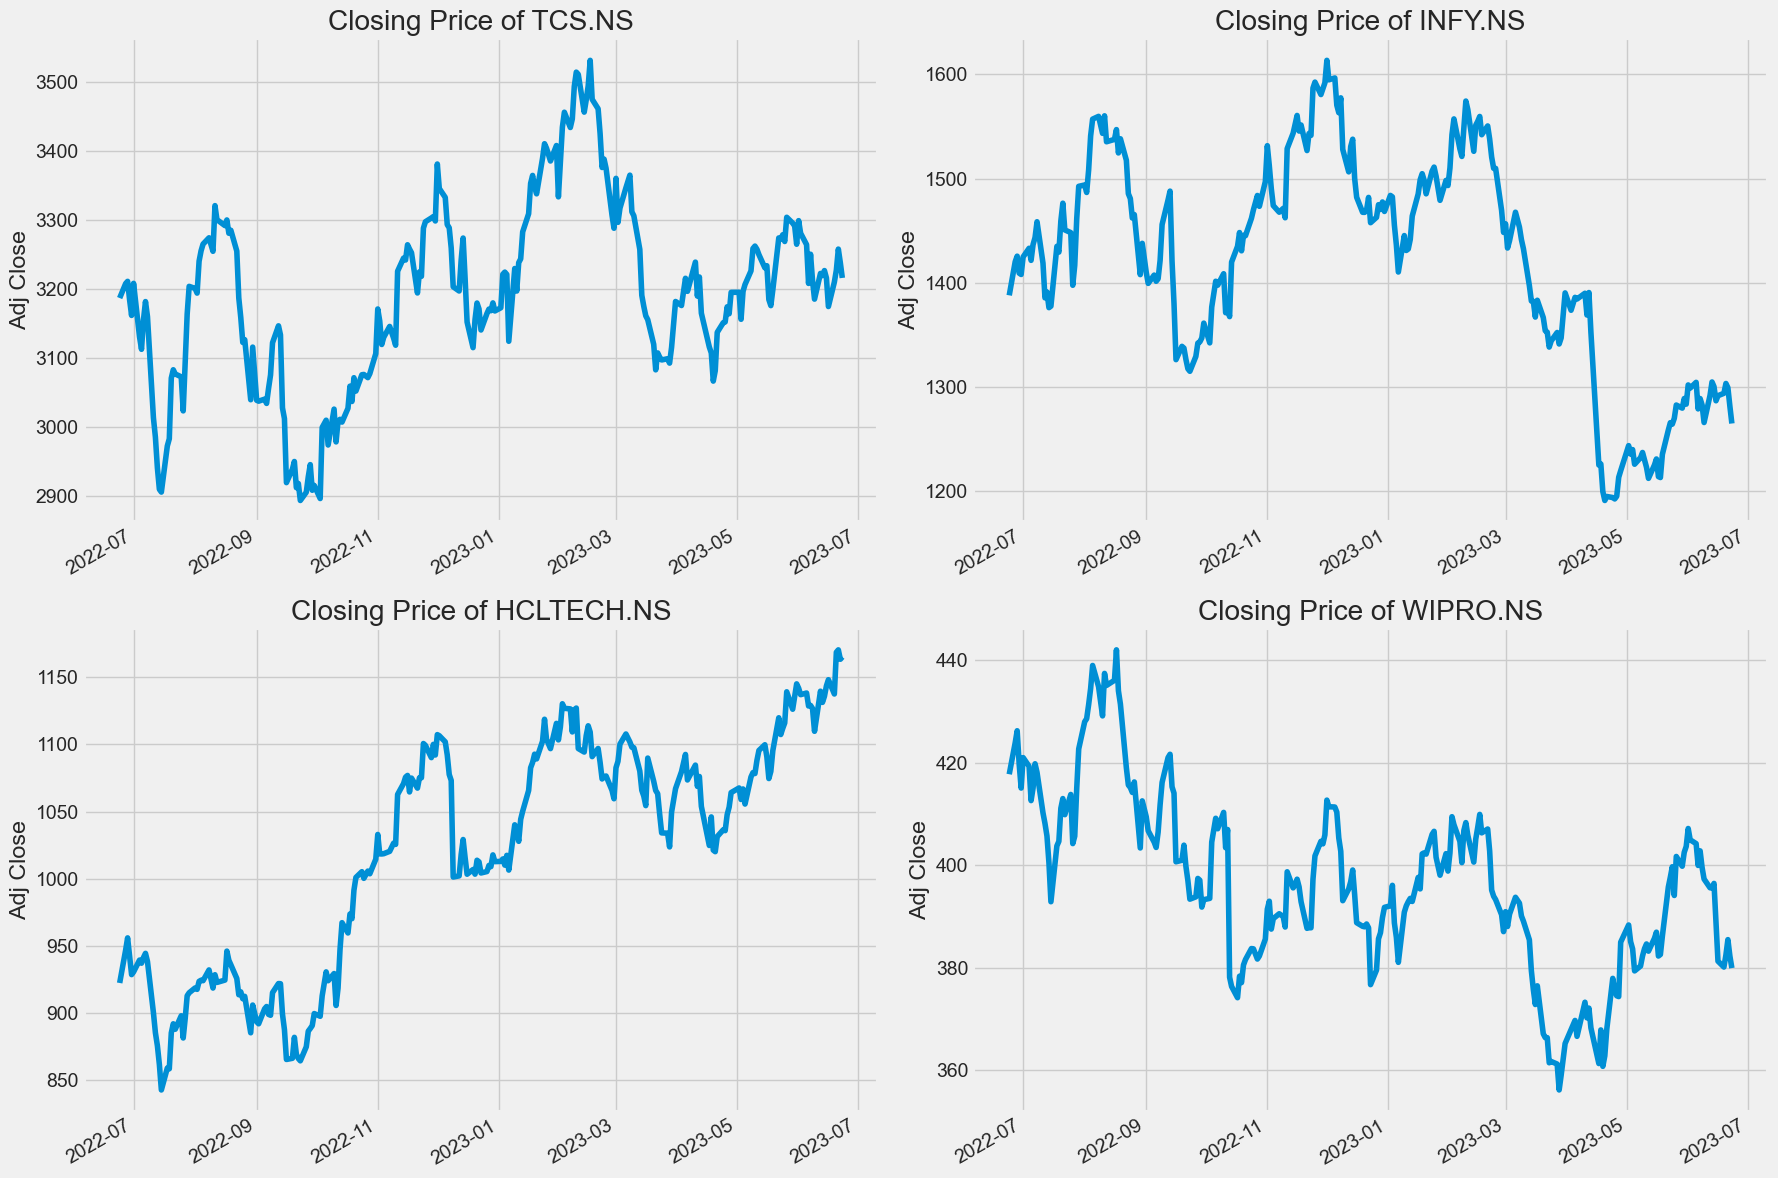

In [8]:
# Let's see a historical view of the closing price
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('')
    plt.title(f"Closing Price of {stock_list[i - 1]}")
    
plt.tight_layout()

### Plotting volume of sales of stocks

NameError: name 'fig' is not defined

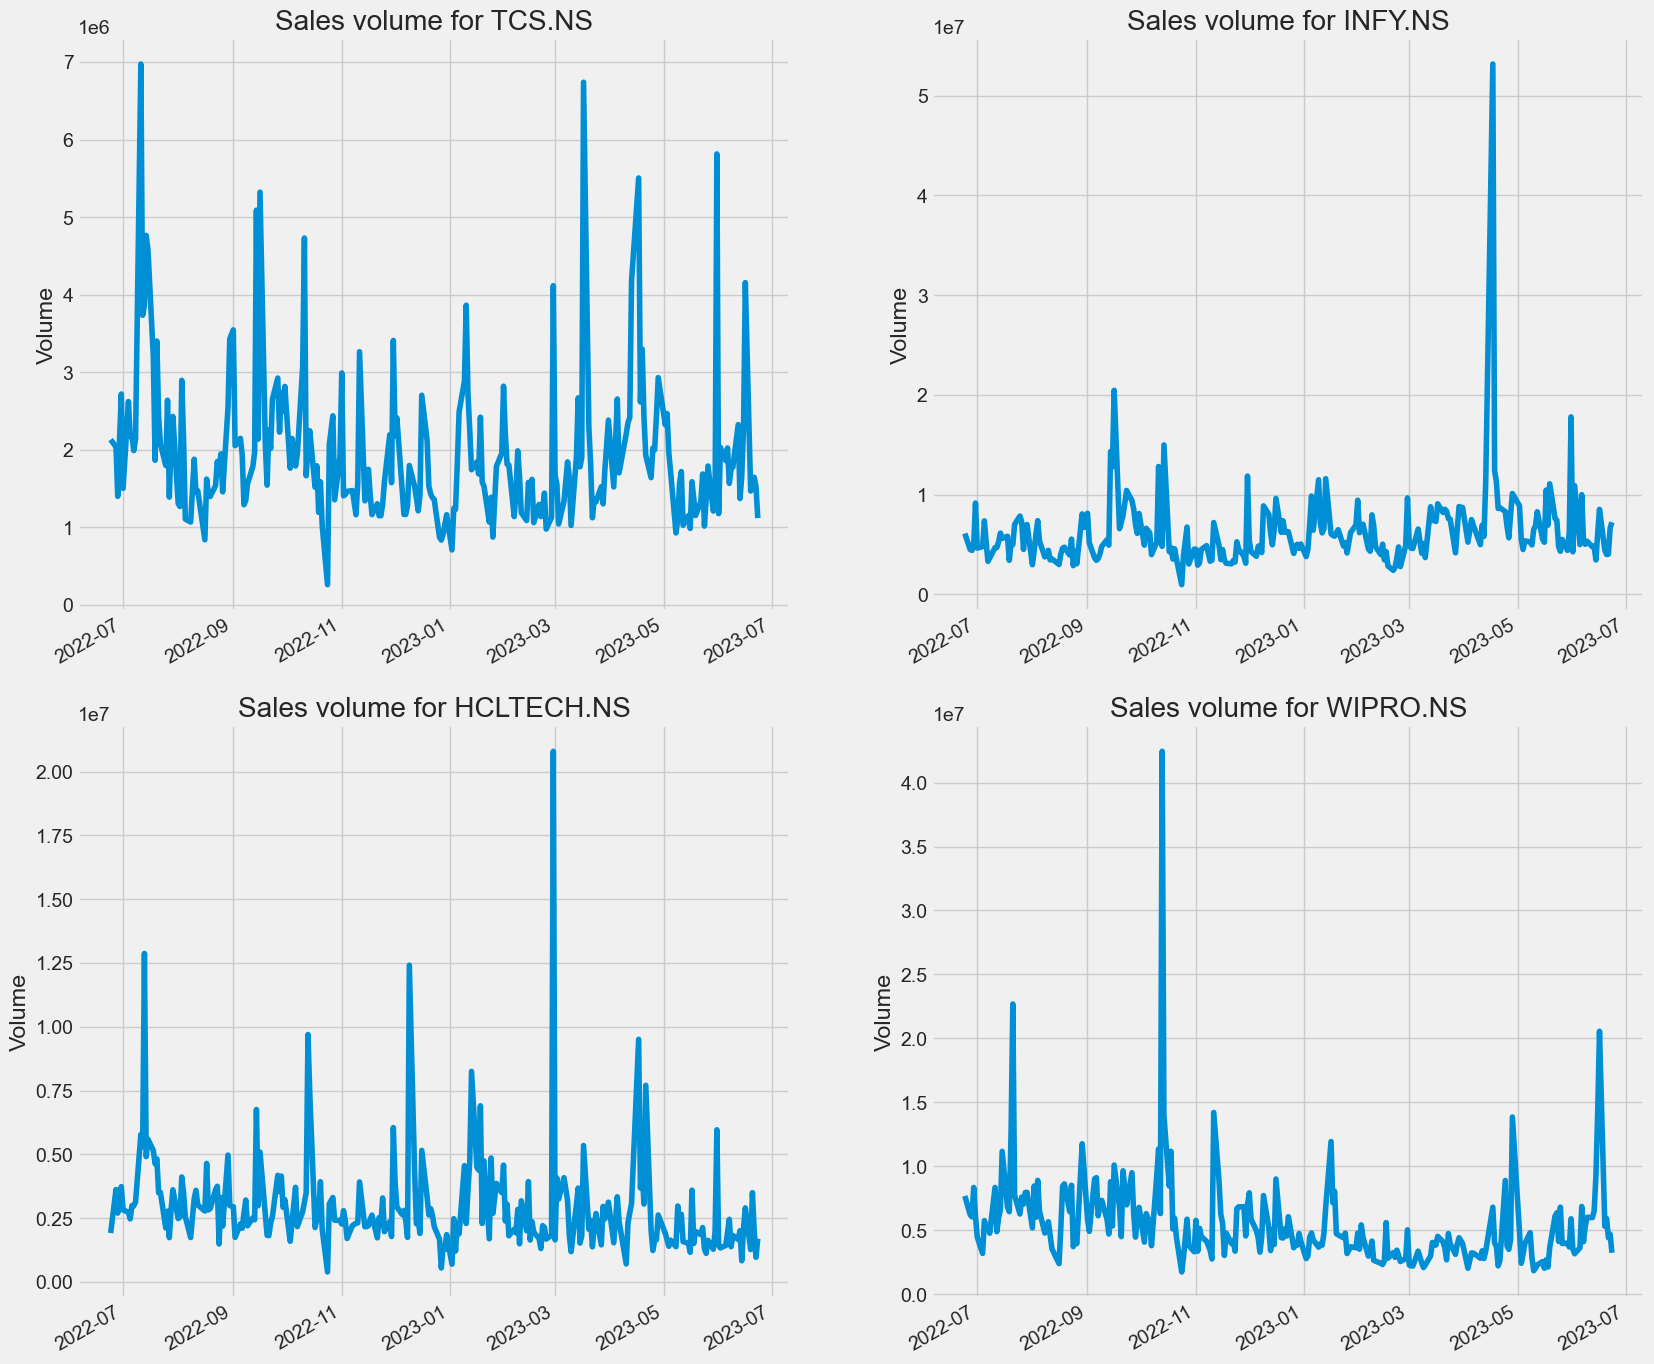

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('')
    plt.title(f"Sales volume for {stock_list[i - 1]}")

fig.tight_layout()

### Moving average of the stocks

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(18)

TCS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TCS')

INFY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('INFY')

HCLTECH[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('HCLTECH')

WIPRO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('WIPRO')

fig.tight_layout()

##### We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

### Seeing the daily returns of stock

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(18)

TCS['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TCS')

INFY['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('INFY')

HCLTECH['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('HCLTECH')

WIPRO['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('WIPRO')

fig.tight_layout()

### Average daily return using a histogram

In [ ]:
plt.figure(figsize=(18, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{stock_list[i - 1]}')
    
plt.tight_layout()

### Correlation between different stock closing prices

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,HCLTECH.NS,INFY.NS,TCS.NS,WIPRO.NS
Date,,,,
2022-06-24,NaN,NaN,NaN,NaN
2022-06-27,0.026534,0.023246,0.006559,0.014687
2022-06-28,0.009674,0.003764,0.001041,0.005531
2022-06-29,-0.014372,-0.011418,-0.008333,-0.015214
2022-06-30,-0.014480,-0.000923,-0.007111,-0.011171


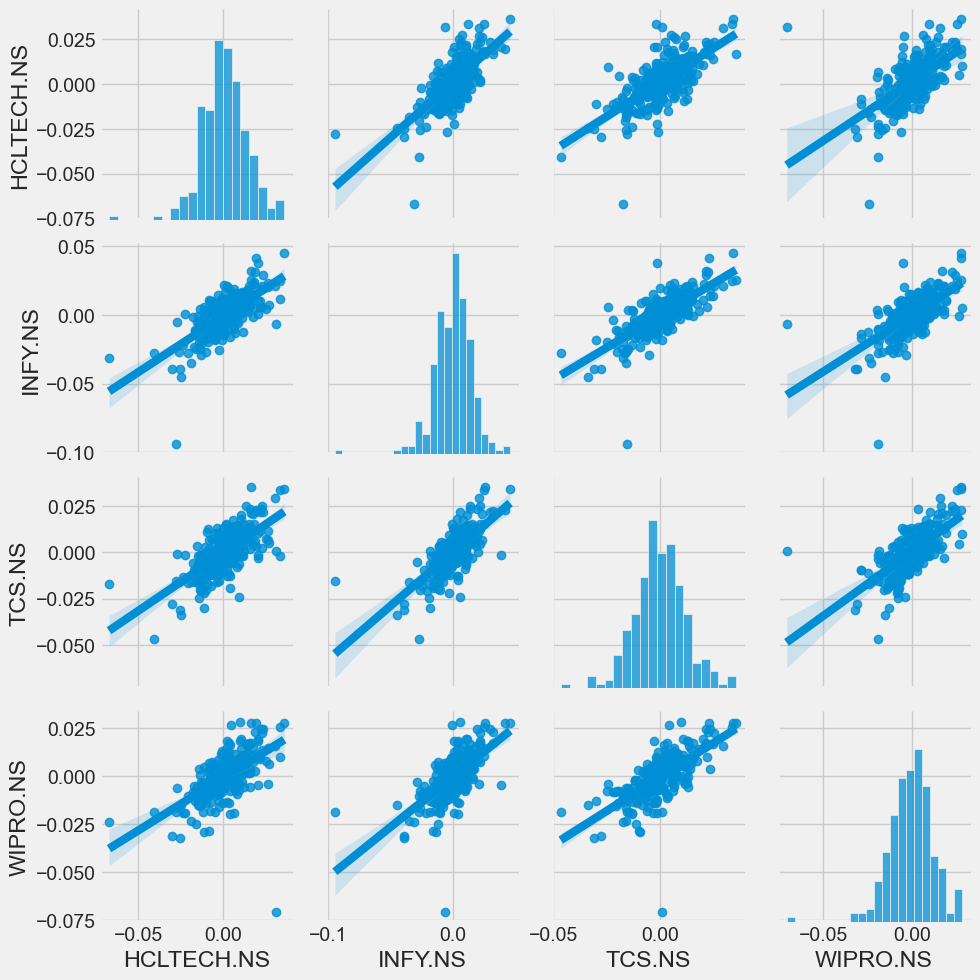

In [11]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

### Correlation Matrix

Text(0.5, 1.0, 'Correlation of stock closing price')

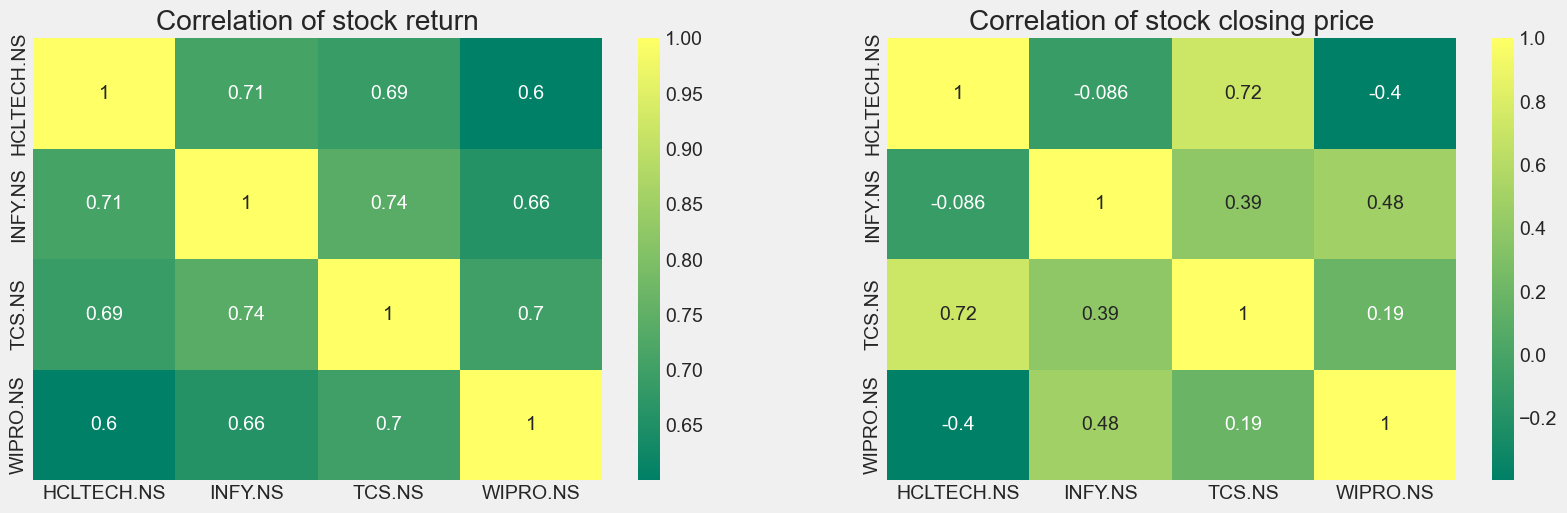

In [12]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

### Risk vs Return analysis

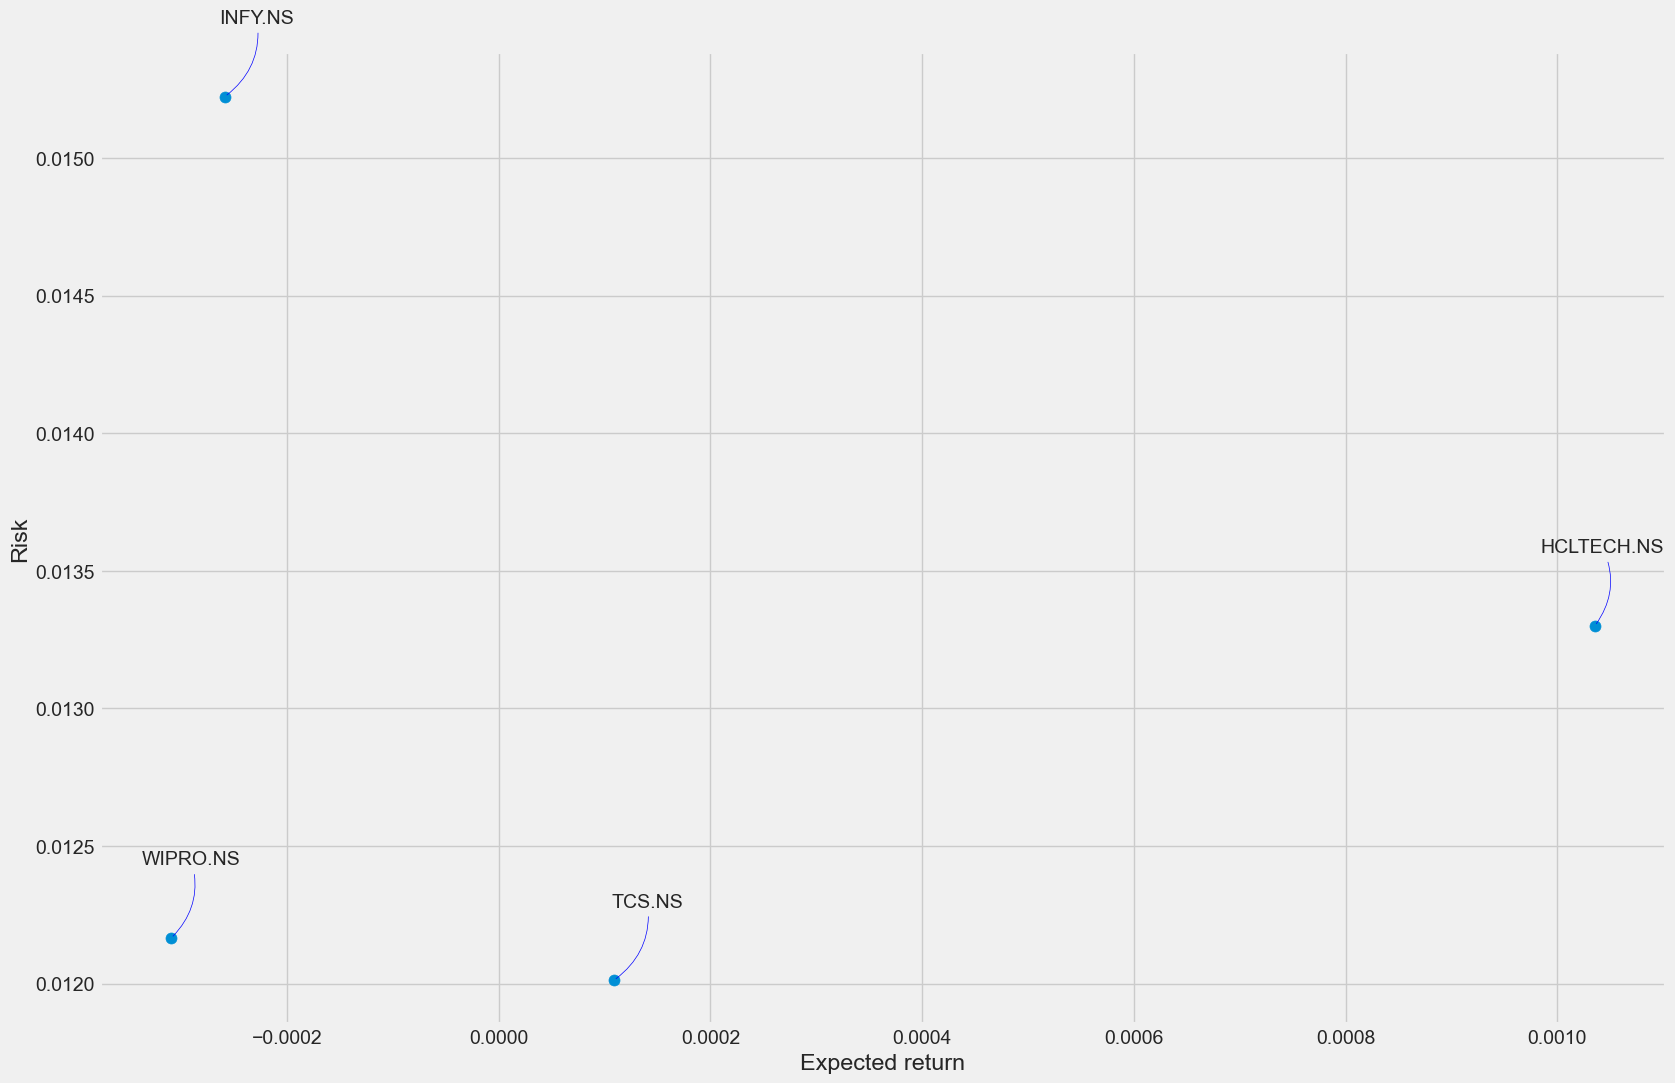

In [13]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(18, 12))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### Predicting the prices of TCS

In [14]:
# Get the stock quote
df = pdr.get_data_yahoo('TCS.NS', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,580.500000,592.974976,576.500000,589.299988,466.506897,2248542
2012-01-03,591.625000,604.950012,590.000000,598.799988,474.027039,2708884
2012-01-04,602.450012,602.500000,584.650024,586.500000,464.290192,2386770
2012-01-05,586.400024,592.500000,583.674988,586.000000,463.894348,2547312
2012-01-06,583.000000,594.174988,578.400024,584.700012,462.865173,2119728
...,...,...,...,...,...,...
2023-06-19,3190.000000,3214.899902,3175.000000,3210.399902,3210.399902,1468186
2023-06-20,3214.000000,3232.500000,3201.050049,3227.699951,3227.699951,1528452
2023-06-21,3250.000000,3261.399902,3223.949951,3258.199951,3258.199951,1645987


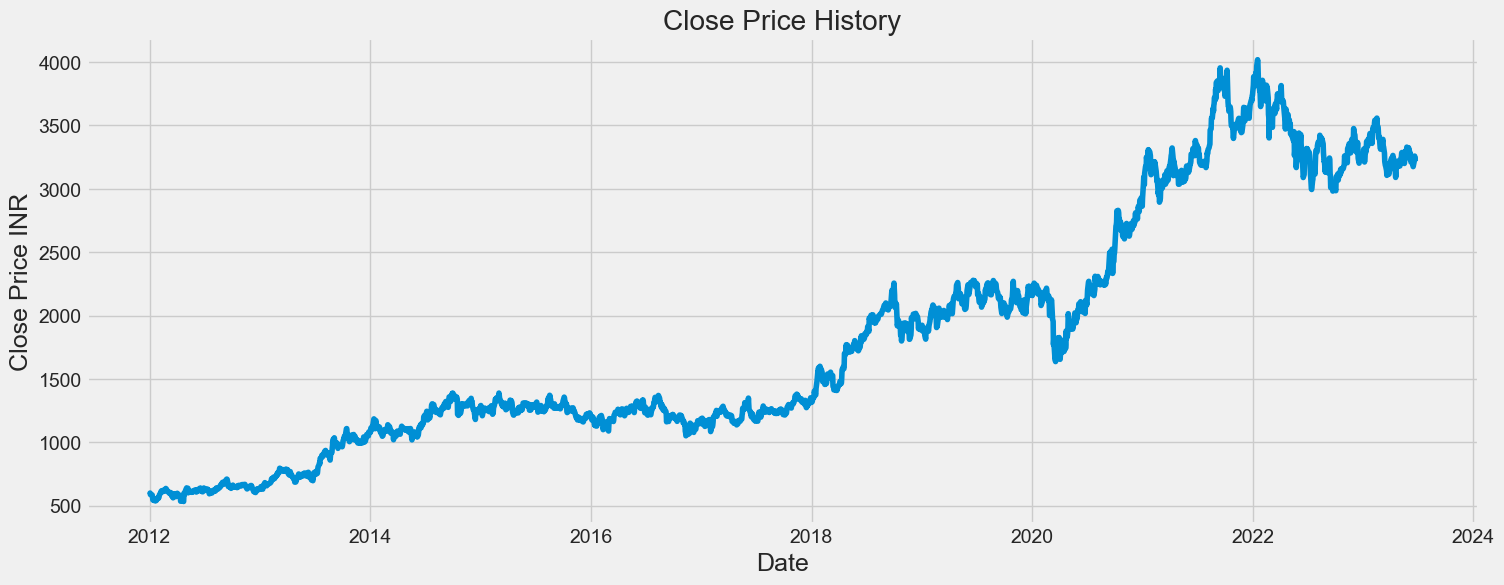

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [16]:
train_val_split = .9
window_size = 30
epochs = 10


In [17]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * train_val_split ))

training_data_len

2548

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0163965 ],
       [0.01912088],
       [0.01559352],
       ...,
       [0.78177674],
       [0.77612724],
       [0.76977514]])

In [19]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0163965 , 0.01912088, 0.01559352, 0.01545013, 0.01507733,
       0.01535693, 0.01450377, 0.01043153, 0.00362056, 0.00308286,
       0.006474  , 0.00569252, 0.00170633, 0.0016203 , 0.00218668,
       0.00192857, 0.00350585, 0.00483937, 0.0063808 , 0.00681096,
       0.00977194, 0.0092414 , 0.0120088 , 0.01538562, 0.01858317,
       0.01917824, 0.02228261, 0.02356593, 0.0242542 , 0.0231501 ])]
[0.022332791471508434]

[array([0.0163965 , 0.01912088, 0.01559352, 0.01545013, 0.01507733,
       0.01535693, 0.01450377, 0.01043153, 0.00362056, 0.00308286,
       0.006474  , 0.00569252, 0.00170633, 0.0016203 , 0.00218668,
       0.00192857, 0.00350585, 0.00483937, 0.0063808 , 0.00681096,
       0.00977194, 0.0092414 , 0.0120088 , 0.01538562, 0.01858317,
       0.01917824, 0.02228261, 0.02356593, 0.0242542 , 0.0231501 ]), array([0.01912088, 0.01559352, 0.01545013, 0.01507733, 0.01535693,
       0.01450377, 0.01043153, 0.00362056, 0.00308286, 0.006474  ,
       0.00569252, 0.00170633, 0

In [20]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, return_sequences=True,input_shape= (x_train.shape[1], 1)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=100, epochs=epochs)

Epoch 1/10
26/26 [==============================] - 6s 69ms/step - loss: 0.0189
Epoch 2/10
26/26 [==============================] - 2s 64ms/step - loss: 8.2628e-04
Epoch 3/10
26/26 [==============================] - 2s 64ms/step - loss: 4.0772e-04
Epoch 4/10
26/26 [==============================] - 2s 63ms/step - loss: 3.6366e-04
Epoch 5/10
26/26 [==============================] - 2s 62ms/step - loss: 3.7063e-04
Epoch 6/10
26/26 [==============================] - 2s 63ms/step - loss: 3.5430e-04
Epoch 7/10
26/26 [==============================] - 2s 60ms/step - loss: 3.6012e-04
Epoch 8/10
26/26 [==============================] - 2s 61ms/step - loss: 3.5074e-04
Epoch 9/10
26/26 [==============================] - 2s 61ms/step - loss: 3.5088e-04
Epoch 10/10
26/26 [==============================] - 2s 65ms/step - loss: 3.3572e-04


In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - window_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9/9 [==============================] - 1s 15ms/step


99.160792036908

C:\Users\Rudrransh\AppData\Local\Temp\ipykernel_12588\3005159404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


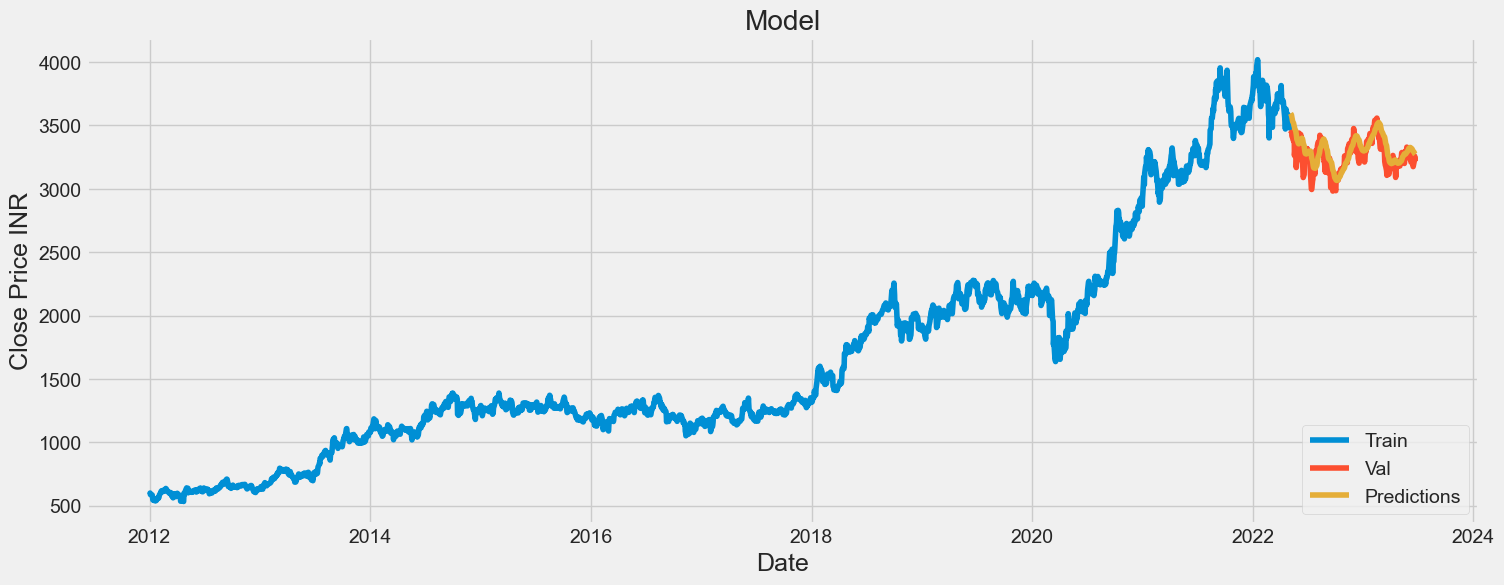

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-05-06,3432.600098,3595.273926
2022-05-09,3445.100098,3583.418701
2022-05-10,3438.750000,3570.898682
2022-05-11,3412.000000,3558.123047
2022-05-12,3408.649902,3544.560791
...,...,...
2023-06-19,3210.399902,3289.187256
2023-06-20,3227.699951,3282.546143
2023-06-21,3258.199951,3277.166748
